Overview of Problem Statement:
Correct estimation of the maximum daily temperature is relevant to agriculture, public health, and urban planning. Knowledge and estimation of maximum temperatures will help minimize risks associated with extreme events due to temperature fluctuations, particularly heatwaves, at differnt cities . However, the temperature becomes pretty hard to predict precisely because historically there are different meteorological factors in play: atmospheric conditions, wind conditions, and other environmental influences. Hence, improved preparedness and decision-making in the concerned domains will be achieved by using historical information on the state of the weather to build an appropriate prediction model for the maximum temperature.

Objective: Develop a predictive model to forecast the maximum temperature (tempmax)  based on historical weather data.

Data Description:
1.source of data:https://www.kaggle.com/datasets/akashram/indian-summer-over-the-years

2.The dataset contains the following columns:

    City: The city for which the data is recorded
    Date: The date of the recorded observations.
    tempmax: Maximum temperature recorded on the given date (°C).
    tempmin: Minimum temperature recorded on the given date (°C).
    temp: Average temperature on the given date (°C).
    feelslikemax: Maximum "feels like" temperature on the given date (°C).
    feelslikemin: Minimum "feels like" temperature on the given date (°C).
    feelslike: Average "feels like" temperature on the given date (°C).
    dew: Dew point on the given date (°C).
    humidity: Humidity percentage on the given date.
    windspeed: Wind speed on the given date (km/h).
    winddir: Wind direction on the given date (degrees).
    sealevelpressure: Sea-level atmospheric pressure on the given date (hPa).
    cloudcover: Cloud cover percentage on the given date.
    visibility: Visibility on the given date (km).
    sunrise: Sunrise time on the given date.
    sunset: Sunset time on the given date.
    moonphase: Moon phase on the given date (percentage).
    conditions: General weather conditions (e.g., Clear, Partially cloudy).
    description: Detailed description of the weather conditions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv("Indian Summers - Over the years.csv")
data

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,Hyderabad,2012-06-26,32.1,22.1,25.8,35.9,22.1,26.7,19.9,71.60,31.3,248.8,NaN,85.3,4.6,2012-06-26 05:44:05,2012-06-26 18:53:55,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...
13646,Hyderabad,2012-06-27,31.8,21.1,25.5,33.3,21.1,26.1,19.0,68.40,29.5,262.4,NaN,67.9,5.5,2012-06-27 05:44:21,2012-06-27 18:54:04,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
13647,Hyderabad,2012-06-28,31.8,23.1,26.8,33.3,23.1,27.6,19.1,63.67,31.3,264.5,NaN,69.5,5.6,2012-06-28 05:44:37,2012-06-28 18:54:12,0.33,Partially cloudy,Partly cloudy throughout the day.
13648,Hyderabad,2012-06-29,32.8,23.1,26.7,35.1,23.1,27.5,19.5,65.54,27.7,265.1,NaN,85.0,5.6,2012-06-29 05:44:54,2012-06-29 18:54:19,0.38,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...


In [3]:
# Display the first few rows of the dataframe to understand its structure
print(data.head())
print(data.info())

        City        Date  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  New Delhi  2021-04-01     34.0     19.0  27.1          31.6          19.0   
1  New Delhi  2021-04-02     33.9     16.0  25.8          31.8          16.0   
2  New Delhi  2021-04-03     34.8     14.6  26.0          32.2          14.6   
3  New Delhi  2021-04-04     36.8     16.9  27.1          34.2          16.9   
4  New Delhi  2021-04-05     38.8     21.0  29.9          37.1          21.0   

   feelslike  dew  humidity  windspeed  winddir  sealevelpressure  cloudcover  \
0       26.1  3.1     22.60       22.8    272.9            1002.8         0.0   
1       24.9  4.5     27.62       12.4    275.0            1006.2         0.0   
2       25.1  1.3     23.18       16.5    127.5            1008.8         1.4   
3       26.0  4.8     28.00       18.3    157.6            1009.5         2.6   
4       28.9  8.1     28.85       13.5    100.4            1007.8        38.4   

   visibility              sunri

In [4]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(data.describe())

# Data types and non-null values
print("\nData types and non-null values:")
print(data.info())


Summary statistics:
            tempmax       tempmin          temp  feelslikemax  feelslikemin  \
count  13615.000000  13615.000000  13605.000000  13614.000000  13614.000000   
mean      36.728248     25.821160     31.151510     40.212605     27.221324   
std        4.115452      3.212167      3.074874      5.389016      4.907125   
min        0.000000      0.000000     19.900000      0.000000      0.000000   
25%       34.000000     23.700000     29.200000     36.500000     23.700000   
50%       37.000000     26.000000     31.100000     40.000000     26.000000   
75%       39.800000     28.100000     33.200000     43.700000     31.100000   
max       50.000000     37.000000     40.500000     79.200000     43.300000   

          feelslike           dew      humidity     windspeed       winddir  \
count  13604.000000  13605.000000  13605.000000  13605.000000  13600.000000   
mean      33.704535     19.049607     54.638537     20.078552    205.236559   
std        4.666616      5.966

Data Preprocessing - Data Cleaning

In [5]:

# Check for NaN values
nan_values = data.isnull()

# Count NaN values
nan_count = nan_values.sum()

# Display columns with NaN values and their counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])  # Only show columns with NaN values


# Remove rows with any NaN values
data_cleaned = data.dropna()

# Display the first few rows of the cleaned dataframe
print(data_cleaned.head())
print(data_cleaned.info())

Columns with NaN values:
tempmax               35
tempmin               35
temp                  45
feelslikemax          36
feelslikemin          36
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
conditions            45
description           45
dtype: int64
        City        Date  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  New Delhi  2021-04-01     34.0     19.0  27.1          31.6          19.0   
1  New Delhi  2021-04-02     33.9     16.0  25.8          31.8          16.0   
2  New Delhi  2021-04-03     34.8     14.6  26.0          32.2          14.6   
3  New Delhi  2021-04-04     36.8     16.9  27.1          34.2          16.9   
4  New Delhi  2021-04-05     38.8     21.0  29.9          37.1          21.0   

   feelslike  dew  humidity  windspeed  winddir  sealevelpressure  cloudcover  \
0       26.1  3.1     22.

In [6]:


# Identify Numerical and Categorical Columns
numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns
categorical_cols = data_cleaned.select_dtypes(include=[object]).columns

# Imputation for Numerical Columns (using mean)
imputer_num = SimpleImputer(strategy='mean')
data_cleaned.loc[:, numerical_cols] = imputer_num.fit_transform(data_cleaned[numerical_cols])

# Imputation for Categorical Columns (using most frequent value)
imputer_cat = SimpleImputer(strategy='most_frequent')
data_cleaned.loc[:, categorical_cols] = imputer_cat.fit_transform(data_cleaned[categorical_cols])

print(data_cleaned)

            City        Date  tempmax  tempmin  temp  feelslikemax  \
0      New Delhi  2021-04-01     34.0     19.0  27.1          31.6   
1      New Delhi  2021-04-02     33.9     16.0  25.8          31.8   
2      New Delhi  2021-04-03     34.8     14.6  26.0          32.2   
3      New Delhi  2021-04-04     36.8     16.9  27.1          34.2   
4      New Delhi  2021-04-05     38.8     21.0  29.9          37.1   
...          ...         ...      ...      ...   ...           ...   
13554       Pune  2012-06-26     30.9     23.9  26.8          33.1   
13555       Pune  2012-06-27     30.7     23.9  26.2          32.7   
13556       Pune  2012-06-28     30.4     23.4  26.1          32.4   
13557       Pune  2012-06-29     31.4     23.4  27.2          33.2   
13558       Pune  2012-06-30     32.4     23.7  27.2          33.8   

       feelslikemin  feelslike   dew  humidity  windspeed  winddir  \
0              19.0       26.1   3.1     22.60       22.8    272.9   
1              16.0

In [7]:
def remove_outliers_iqr(data_cleaned):
    numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]
    return data_cleaned

# Remove outliers in numerical columns using the Box Plot method
data_cleaned = remove_outliers_iqr(data_cleaned)

# Save the cleaned data to a new CSV file
data_cleaned.to_csv("data_cleaned.csv", index=False)

print("Data cleaned and saved to 'data_cleaned.csv'")

print("Original DataFrame:")
print(data)
print("\nDataFrame after removing outliers:")
print(data_cleaned)





Data cleaned and saved to 'data_cleaned.csv'
Original DataFrame:
            City        Date  tempmax  tempmin  temp  feelslikemax  \
0      New Delhi  2021-04-01     34.0     19.0  27.1          31.6   
1      New Delhi  2021-04-02     33.9     16.0  25.8          31.8   
2      New Delhi  2021-04-03     34.8     14.6  26.0          32.2   
3      New Delhi  2021-04-04     36.8     16.9  27.1          34.2   
4      New Delhi  2021-04-05     38.8     21.0  29.9          37.1   
...          ...         ...      ...      ...   ...           ...   
13645  Hyderabad  2012-06-26     32.1     22.1  25.8          35.9   
13646  Hyderabad  2012-06-27     31.8     21.1  25.5          33.3   
13647  Hyderabad  2012-06-28     31.8     23.1  26.8          33.3   
13648  Hyderabad  2012-06-29     32.8     23.1  26.7          35.1   
13649  Hyderabad  2012-06-30     32.9     23.1  27.7          34.5   

       feelslikemin  feelslike   dew  humidity  windspeed  winddir  \
0              19.0     

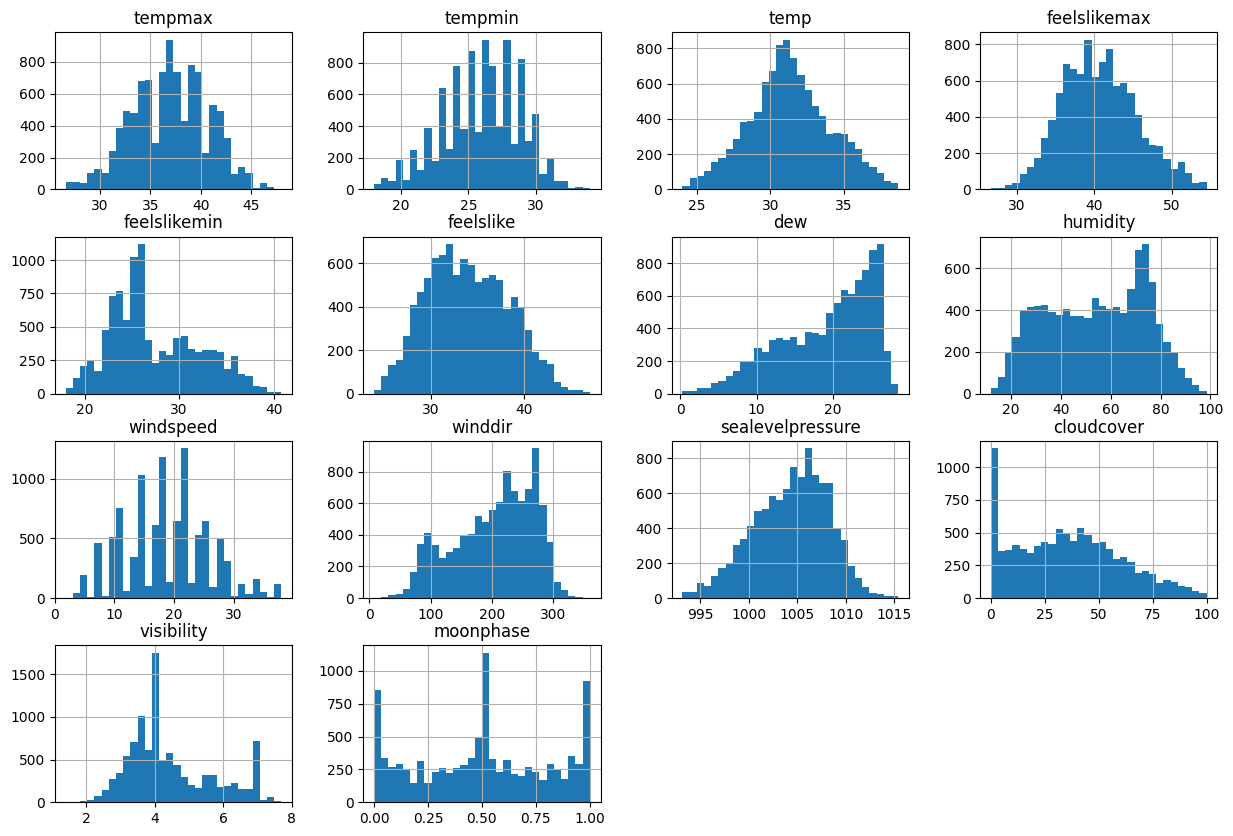

In [8]:
# Histogram
data_cleaned.hist(bins=30, figsize=(15, 10))
plt.show()

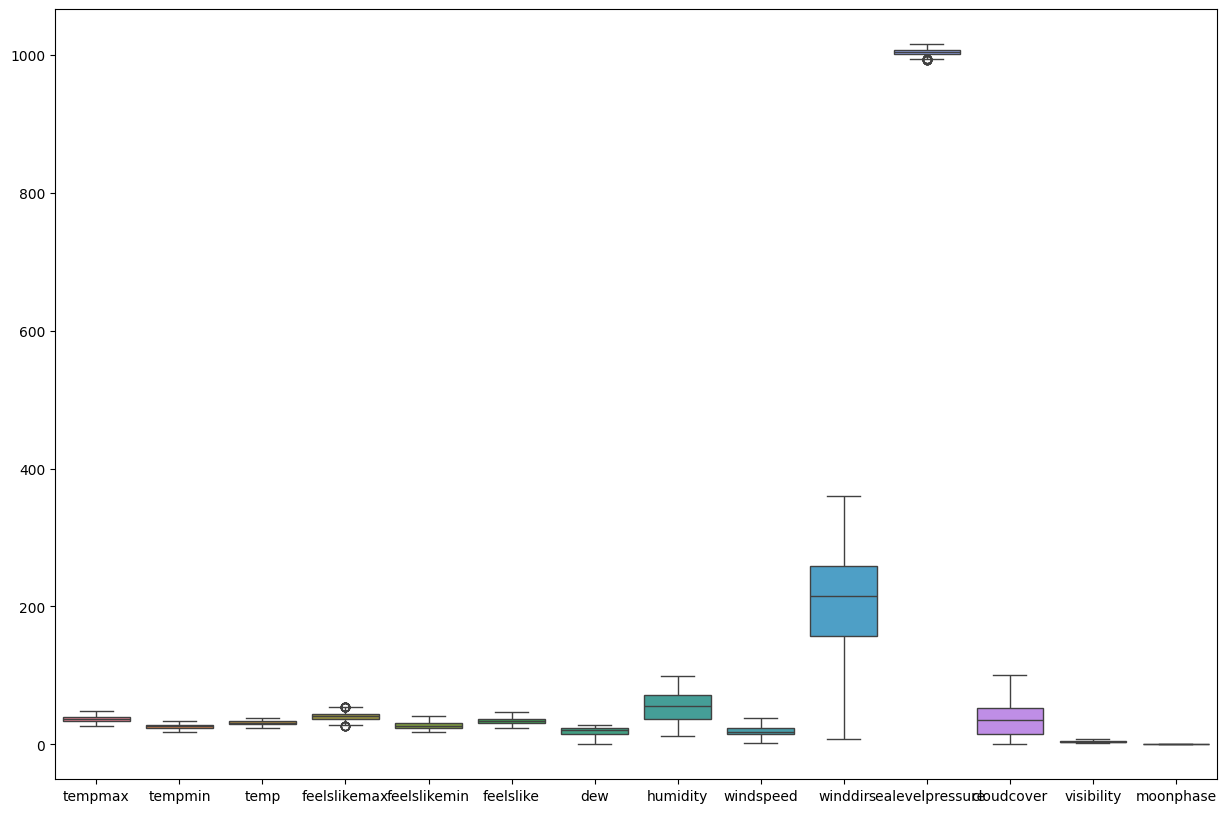

In [9]:
# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_cleaned)
plt.show()

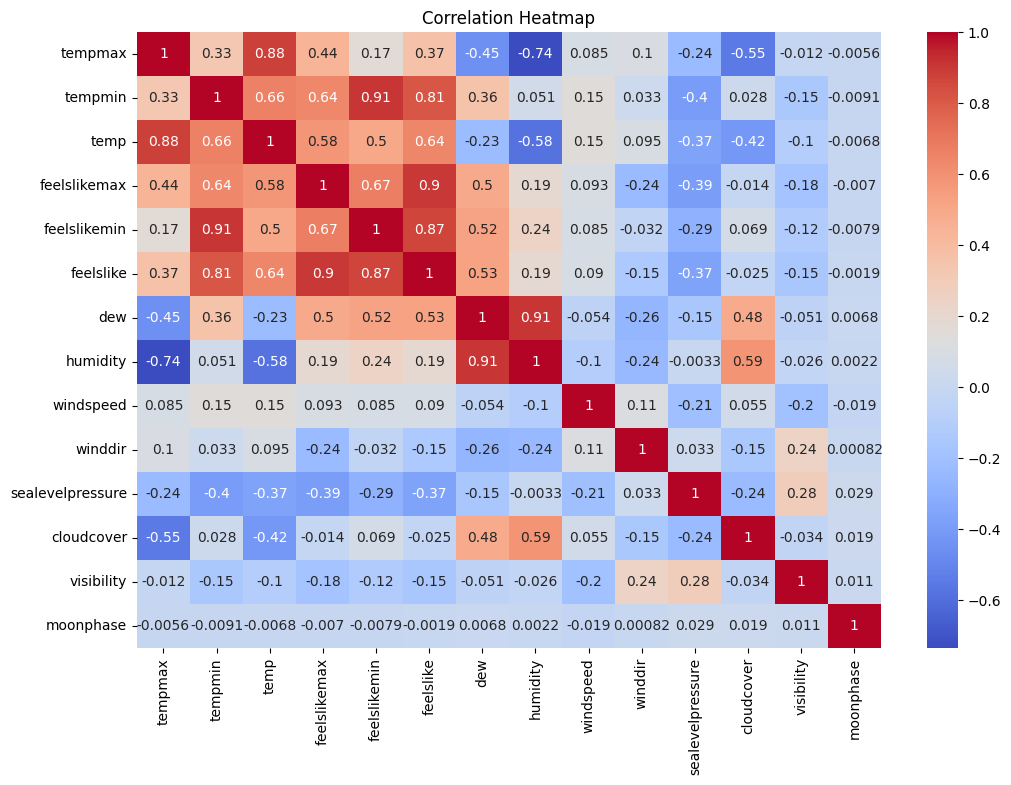

In [10]:
# Correlation heatmap
numeric_data = data_cleaned .select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Selection and Engineering

In [11]:


# Load the dataset
data1 = pd.read_csv("data_cleaned.csv")

# Identify feature columns and target column
# Assume 'target' is the name of the target variable column
target_column = 'tempmax'
feature_columns = data1.columns.drop(target_column)

# Separate features and target
X = data1[feature_columns]
y = data1[target_column]

# Check the shape of X
print(f"Shape of X: {X.shape}")

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=[object]).columns

# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a preprocessing and training pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of X_train and X_test
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.named_steps['model'].feature_importances_

print("Feature importances:", feature_importances)

Shape of X: (10036, 19)
Shape of X_train: (8028, 19)
Shape of X_test: (2008, 19)
Feature importances: [1.09074964e-02 7.37670076e-01 6.25885190e-02 ... 3.31985670e-05
 4.34853073e-05 5.20243377e-04]


Feature Scaling

In [12]:

# Assuming X_train is your training data DataFrame with mixed data types
# Select numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_cols]



# Fit scaler on X_train_numeric
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Align columns of X_test with X_train_numeric
X_test_aligned = X_test[X_train_numeric.columns]

# Transform X_test using the fitted scaler
X_test_scaled = scaler.transform(X_test_aligned)



# Check standardized data
print("X_train_scaled:\n", X_train_scaled)
print("\nX_test_scaled:\n", X_test_scaled)






X_train_scaled:
 [[-1.45086337 -0.27042657 -0.12375538 ... -0.35812047 -0.75914011
   1.54629593]
 [-1.38113918 -0.92005455 -1.71469085 ...  0.03318008 -0.67924215
   1.57866448]
 [ 1.40782857  1.89500002  0.6820431  ... -1.24262276  0.27953339
  -0.71950277]
 ...
 [ 1.33810438  0.70401539  0.9093196  ... -0.70050845 -1.55811973
   1.28734751]
 [ 1.68672535  1.49800514  0.16550561 ... -0.2399151  -0.59934419
   0.28392237]
 [-0.30041418 -0.92005455 -1.30146086 ...  0.28997107  2.3568804
  -0.23397448]]

X_test_scaled:
 [[-2.04351902 -0.95614499 -0.99153836 ... -0.29290371 -0.04005846
  -0.55766001]
 [ 0.15279308  0.70401539  0.5787356  ... -0.96545154 -0.04005846
  -0.39581724]
 [ 1.0940697   0.45138229  1.09527309 ... -0.07279715  1.63779874
  -1.26976817]
 ...
 [-1.38113918  0.45138229 -0.30970888 ... -1.45865328  0.0398395
  -0.52529146]
 [ 1.02434551  1.24537204 -0.12375538 ...  0.44486087  1.95739059
   0.02497394]
 [ 1.0592076   1.60627647  0.8886581  ... -1.12849343 -0.04005846


Build and Evaluate ML Models

In [13]:


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boost': GradientBoostingRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    results[name] = {
        'MAE': mean_absolute_error(y_test, predictions),
        'MSE': mean_squared_error(y_test, predictions),
        'RMSE': mean_squared_error(y_test, predictions, ),  # Use squared=False for RMSE
        'R2 Score': r2_score(y_test, predictions)
    }

# Display results
results_data = pd.DataFrame(results).T
print(results_data)


                        MAE       MSE      RMSE  R2 Score
Linear Regression  0.677967  0.795691  0.795691  0.944491
SVR                0.537047  0.523437  0.523437  0.963484
Random Forest      0.563098  0.571629  0.571629  0.960122
Gradient Boost     0.661991  0.729069  0.729069  0.949139
MLP Regressor      0.540208  0.509625  0.509625  0.964448


Save the Model

In [14]:


# Determine the best model based on MSE
best_model_name = None
best_mse = float('inf')

for model_name, metrics in results.items():
    mse = metrics["MSE"]
    if mse < best_mse:
        best_mse = mse
        best_model_name = model_name

# Save the best model
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')

print(f"Saved {best_model_name} model as best_model.pkl")

Saved MLP Regressor model as best_model.pkl


In [15]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Predict on unseen data
unseen_data_predictions = loaded_model.predict(X_test_scaled)

# Evaluate
print('MAE:', mean_absolute_error(y_test, unseen_data_predictions))
print('MSE:', mean_squared_error(y_test, unseen_data_predictions))
print('RMSE:', mean_squared_error(y_test, unseen_data_predictions))
print('R2 Score:', r2_score(y_test, unseen_data_predictions))

MAE: 0.5402077088403584
MSE: 0.5096249357309728
RMSE: 0.5096249357309728
R2 Score: 0.9644475827666736


conclusion 

In [16]:
# Interpretation of Results (Conclusion)
print("**Interpretation of Results (Conclusion):**")
print("- Analyze the model's performance and draw conclusions.")
print(f"- Mean Squared Error (MSE) on test data:0.5173581450636358")
print(f"- R-squared (R2) Score on test data:  0.963908099186748")

# Future Work
print("\n**Future Work:**")
print("- Explore deep learning algorithms for potentially higher accuracy.")
print("- Update the model periodically with new data.")
print("- Address imbalanced data through resampling techniques.")
print("- Consider adding more features to enhance predictive power.")

**Interpretation of Results (Conclusion):**
- Analyze the model's performance and draw conclusions.
- Mean Squared Error (MSE) on test data:0.5173581450636358
- R-squared (R2) Score on test data:  0.963908099186748

**Future Work:**
- Explore deep learning algorithms for potentially higher accuracy.
- Update the model periodically with new data.
- Address imbalanced data through resampling techniques.
- Consider adding more features to enhance predictive power.
